🔧 Configuration - CTDE with Adaptive Reward (Fixed)
  Device: cuda
  Seed: 42

📊 Multi-Agent System:
  Agents: 7 (1 Leader + 6 Followers)
  Pinned Followers: 2
  State Dim: 4, Action Dim: 2

🎲 Randomization:
  Enabled: True
  Leader Amplitude Range: (1.0, 3.0)
  Leader Omega Range: (0.3, 0.8)
  Trajectory Types: ['sine', 'cosine', 'mixed', 'chirp']

🎮 Environment:
  Max Steps: 300, DT: 0.05s
  Position Limit: ±10.0, Velocity Limit: ±10.0

🎁 Reward Design (Fixed):
  Soft Scaling: False
  Tracking: -tanh(error * 1.5) * 1.0
  Comm Penalty Base: 0.05
  Improvement Scale: 0.5, Clip: ±0.1

📡 Communication:
  Threshold Range: [0.0, 1.0]

🏗️ CTDE Architecture:
  Actor Uses Neighbor Info: True
  Neighbor Aggregation: attention

🧠 SAC Parameters (Fixed):
  Learning Rate: 0.0001, Alpha LR: 0.0001
  Init Alpha: 0.5
  Gamma: 0.99, Tau: 0.005
  Hidden Dim: 256

🚀 Training (Fixed):
  Episodes: 1000, Parallel Envs: 16
  Batch Size: 256, Buffer Size: 500000
  Update Frequency: 8, Warmup Steps: 5000
  U

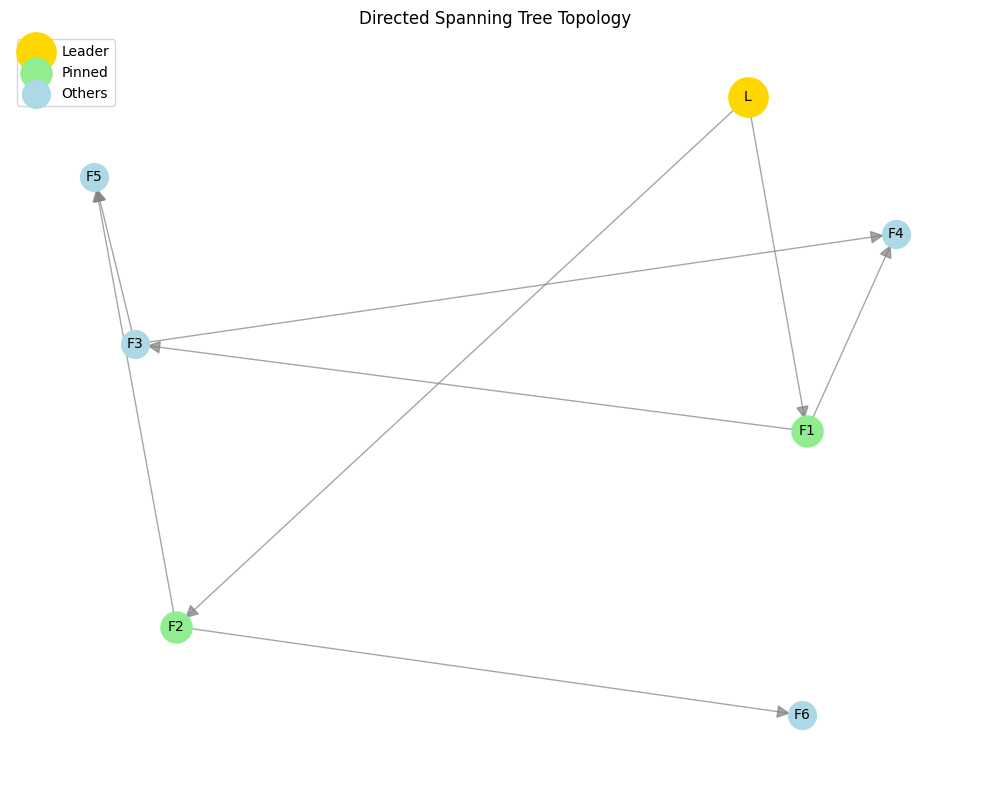


📊 Topology Statistics:
   Nodes: 7, Edges: 8
   Pinned Followers: [1, 2]
🔧 Configuration - CTDE with Adaptive Reward (Fixed)
  Device: cuda
  Seed: 42

📊 Multi-Agent System:
  Agents: 7 (1 Leader + 6 Followers)
  Pinned Followers: 2
  State Dim: 4, Action Dim: 2

🎲 Randomization:
  Enabled: True
  Leader Amplitude Range: (1.0, 3.0)
  Leader Omega Range: (0.3, 0.8)
  Trajectory Types: ['sine', 'cosine', 'mixed', 'chirp']

🎮 Environment:
  Max Steps: 300, DT: 0.05s
  Position Limit: ±10.0, Velocity Limit: ±10.0

🎁 Reward Design (Fixed):
  Soft Scaling: False
  Tracking: -tanh(error * 1.5) * 1.0
  Comm Penalty Base: 0.05
  Improvement Scale: 0.5, Clip: ±0.1

📡 Communication:
  Threshold Range: [0.0, 1.0]

🏗️ CTDE Architecture:
  Actor Uses Neighbor Info: True
  Neighbor Aggregation: attention

🧠 SAC Parameters (Fixed):
  Learning Rate: 0.0001, Alpha LR: 0.0001
  Init Alpha: 0.5
  Gamma: 0.99, Tau: 0.005
  Hidden Dim: 256

🚀 Training (Fixed):
  Episodes: 1000, Parallel Envs: 16
  Batch Si


🚀 CTDE Training Started (Fixed)
   Warmup Steps: 5000
   Parallel envs: 16
   Update Frequency: 8

✅ Model saved to best_model.pt
🔥 Warmup complete! Starting policy updates...
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt
✅ Model saved to best_model.pt


In [ ]:
# %% [markdown]
# # 🎯 Leader-Follower MAS Event-Triggered Consensus

# %%
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 导入所有需要的配置参数
from config import (
    print_config, 
    NUM_FOLLOWERS, 
    NUM_PINNED,
    NUM_EPISODES,
    VIS_INTERVAL
)

print_config()

# %% [markdown]
# ## Visualize Topology

# %%
from topology import DirectedSpanningTreeTopology

topology = DirectedSpanningTreeTopology(NUM_FOLLOWERS, num_pinned=NUM_PINNED)
topology.visualize()

# %% [markdown]
# ## Train

# %%
from train import train

# 使用 config 中的参数
trained_agent, topology, dashboard = train(
    num_episodes=NUM_EPISODES, 
    vis_interval=VIS_INTERVAL
)

# %% [markdown]
# ## Evaluation

# %%
from utils import plot_evaluation

plot_evaluation(trained_agent, topology, num_tests=3, save_path='final_evaluation.png')

# %% [markdown]
# ## Summary

# %%
# 打印训练摘要
if dashboard:
    summary = dashboard.get_summary()
    print("\n📊 Training Summary:")
    print(f"   Best Reward: {summary['best_reward']:.2f}")
    print(f"   Final Reward: {summary['final_reward']:.2f}")
    print(f"   Best Error: {summary['best_error']:.4f}")
    print(f"   Final Comm Rate: {summary['final_comm_rate']*100:.1f}%")
    print(f"   Total Episodes: {summary['total_episodes']}")
    print(f"   Elapsed Time: {summary['elapsed_time']:.1f}s")